In [1]:
#importing important packages
import pandas as pd
import numpy as np

In [2]:
#wczytanie danych
df=pd.read_csv("train.csv")

In [3]:
df.shape

(614, 13)

In [4]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
#missing values
df['Gender'].fillna('Male', inplace=True)

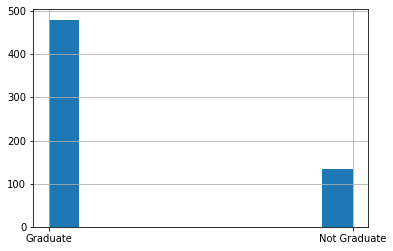

In [6]:
df.Education.hist()

In [7]:
# df.Education.fillna('Graduate', inplace=True)

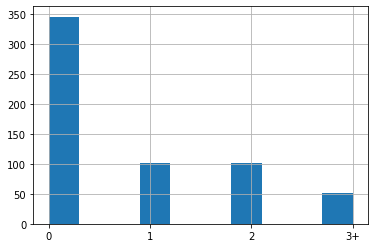

In [8]:
df.Dependents.hist()

In [9]:
df.Dependents.fillna('0', inplace=True)

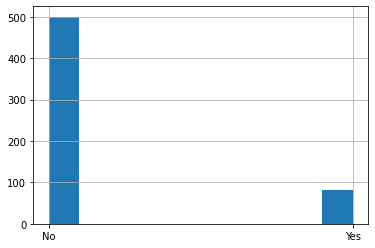

In [10]:
df.Self_Employed.hist()

In [11]:
df.Self_Employed.fillna('No', inplace=True)

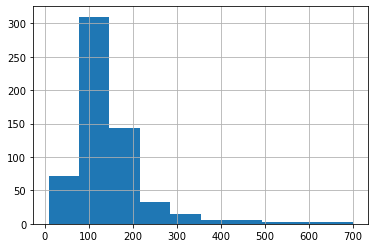

In [12]:
df.LoanAmount.hist()

In [13]:
df.LoanAmount.fillna(df.LoanAmount.mean(), inplace=True)

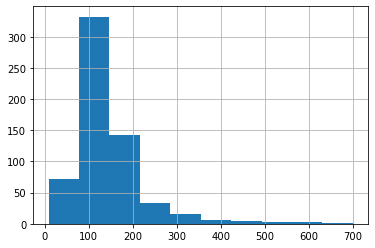

In [14]:
df.LoanAmount.hist()

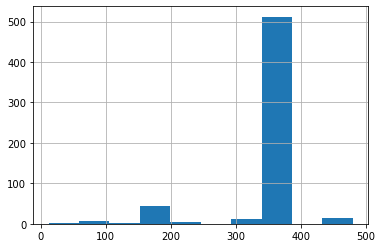

In [15]:
df.Loan_Amount_Term.hist()

In [16]:
df.Loan_Amount_Term.fillna(df.Loan_Amount_Term.mean(), inplace=True)

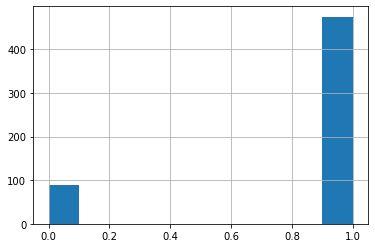

In [17]:
df.Credit_History.hist()

In [18]:
df.Credit_History.fillna(1. , inplace=True)

In [19]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              3
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

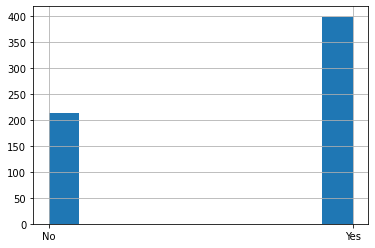

In [20]:
df.Married.hist()

In [21]:
df.Married.fillna("Yes", inplace=True)

In [22]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.855049
std,6109.041673,2926.248369,84.037468,64.372489,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [23]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [24]:
# one-host-encoding
df_dummies = pd.get_dummies(df.drop('Loan_Status',axis=1))
target = df.Loan_Status

In [25]:
df_dummies.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_ID_LP001002,Loan_ID_LP001003,Loan_ID_LP001005,Loan_ID_LP001006,Loan_ID_LP001008,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,146.412162,360.0,1.0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.000000,360.0,1.0,0,1,0,0,0,...,1,0,0,1,0,1,0,1,0,0
2,3000,0.0,66.000000,360.0,1.0,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.000000,360.0,1.0,0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.000000,360.0,1.0,0,0,0,0,1,...,0,0,0,1,0,1,0,0,0,1


In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_dummies, target, test_size=0.3, random_state=0)

In [27]:
#create dummies
# x_train=pd.get_dummies(x_train)
# x_test=pd.get_dummies(x_test)

In [28]:
y_train

351    N
593    Y
320    Y
186    N
557    Y
      ..
277    Y
9      N
359    Y
192    N
559    Y
Name: Loan_Status, Length: 429, dtype: object

In [29]:
from sklearn.ensemble import BaggingClassifier
from sklearn import tree
model = BaggingClassifier(tree.DecisionTreeClassifier(random_state=1))
model.fit(x_train, y_train)
model.score(x_test,y_test)

0.8054054054054054

In [30]:
from sklearn.ensemble import BaggingRegressor
model = BaggingRegressor(tree.DecisionTreeRegressor(random_state=1))
target_train = y_train.replace(('Y', 'N'), (1, 0))
target_test = y_test.replace(('Y', 'N'), (1, 0))
model.fit(x_train, target_train)
model.score(x_test, target_test)

0.19411033069944383

In [31]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(random_state=1)
model.fit(x_train, y_train)
model.score(x_test,y_test)

0.8162162162162162

In [32]:
from sklearn.ensemble import AdaBoostRegressor
model = AdaBoostRegressor()
model.fit(x_train, target_train)
model.score(x_test, target_test)

0.28410984192704836

In [33]:
from sklearn.ensemble import GradientBoostingClassifier
model= GradientBoostingClassifier(learning_rate=0.01,random_state=1)
model.fit(x_train, y_train)
model.score(x_test,y_test)

0.827027027027027

In [34]:
from sklearn.ensemble import GradientBoostingRegressor
model= GradientBoostingRegressor()
model.fit(x_train, target_train)
model.score(x_test, target_test)

0.28338671244047076

In [35]:
# !pip3 install xgboost #instalacja
# !pip3 install lightgbm #instalacja
# !pip3 install catboost

ERROR: Invalid requirement: '#instalacja'
ERROR: Invalid requirement: '#instalacja'


^C


In [36]:
import xgboost as xgb #wczytanie
model=xgb.XGBClassifier(random_state=1,learning_rate=0.01)
model.fit(x_train, y_train)
model.score(x_test,y_test)

0.8054054054054054

In [37]:
import xgboost as xgb
model=xgb.XGBRegressor()
model.fit(x_train, target_train)
model.score(x_test, target_test)

0.24404519099418598

In [39]:
import lightgbm as lgb
train_data=lgb.Dataset(x_train,label=target_train)
#define parameters
params = {'learning_rate':0.001}
model= lgb.train(params, train_data, 100) 
y_pred=model.predict(x_test)
for i in range(0,185):
    if y_pred[i]>=0.5: 
       y_pred[i]=1
    else: 
       y_pred[i]=0

In [41]:
import lightgbm as lgb
train_data=lgb.Dataset(x_train,label=target_train)
params = {'learning_rate':0.001}
model= lgb.train(params, train_data, 100)
from sklearn.metrics import mean_squared_error
rmse=mean_squared_error(y_pred,target_test)**0.5

In [47]:
from catboost import CatBoostClassifier
model=CatBoostClassifier()
categorical_features_indices = np.where(df.dtypes != np.float)[0]
model.fit(x_train,target_train,cat_features=([ 0,  1, 2, 3, 4, 10]),eval_set=(x_test, target_test))
model.score(x_test,target_test)

CatBoostError: Invalid type for cat_feature[non-default value idx=0,feature_idx=1]=4167.0 : cat_features must be integer or string, real number values and NaN values should be converted to string.

In [20]:
from catboost import CatBoostRegressor
model=CatBoostRegressor()
categorical_features_indices = np.where(df.dtypes != np.float)[0]
model.fit(x_train,y_train,cat_features=([ 0,  1, 2, 3, 4, 10]),eval_set=(x_test, y_test))
model.score(x_test,y_test)

ModuleNotFoundError: No module named 'catboost'

# Zadanie Domowe

1. EDA - Rekrutacja na studia ("Placement_Data_Full_Class.csv")
Wykonaj analizę danych i odpowiedz na poniższe pytania:  
    1. Który czynnik decyduje o przyjęciu kandydata na studia?  
    2. Czy procenty uzyskane w testach (zmienne *_p) wpływają w jakimś stopniu na to, czy kandydat zostanie przyjęty?
    3. Jaka specjalizacja jest najbardziej pożądana przez firmy?
    4. Przeprowadź wszelkiego rodzaju analizy i testy statystyczne - wedle uznania

In [33]:
# Importing packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [123]:
# Importing data
df = pd.read_csv("Placement_Data_Full_Class.csv")

In [124]:
# Getting to know the data
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [125]:
# Getting to know the data
df.shape

(215, 15)

In [126]:
# Getting to know the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [127]:
# Getting to know the data
df.columns

Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status', 'salary'],
      dtype='object')

In [128]:
# Getting to know the data
df.dtypes

sl_no               int64
gender             object
ssc_p             float64
ssc_b              object
hsc_p             float64
hsc_b              object
hsc_s              object
degree_p          float64
degree_t           object
workex             object
etest_p           float64
specialisation     object
mba_p             float64
status             object
salary            float64
dtype: object

In [129]:
# Getting to know the data
df.isna().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [130]:
# Getting to know the data
df.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [131]:
# Handling missing salary data
# NaN values in salary column mean that student were not placed therefore their salary should = 0
# However, I will not impute 0s in place of NaN performing EDA - this should be done in data preprocessing 
# df.salary.fillna(0, inplace = True)

In [134]:
# Handling missing salary data 
# df.isna().sum()

In [135]:
# Getting to know the data
corr = df.corr()
corr

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
sl_no,1.000000,-0.078155,-0.085711,-0.088281,0.063636,0.022327,0.063764
ssc_p,-0.078155,1.000000,0.511472,0.538404,0.261993,0.388478,0.035330
hsc_p,-0.085711,0.511472,1.000000,0.434206,0.245113,0.354823,0.076819
degree_p,-0.088281,0.538404,0.434206,1.000000,0.224470,0.402364,-0.019272
etest_p,0.063636,0.261993,0.245113,0.224470,1.000000,0.218055,0.178307
mba_p,0.022327,0.388478,0.354823,0.402364,0.218055,1.000000,0.175013
salary,0.063764,0.035330,0.076819,-0.019272,0.178307,0.175013,1.000000


<AxesSubplot:>

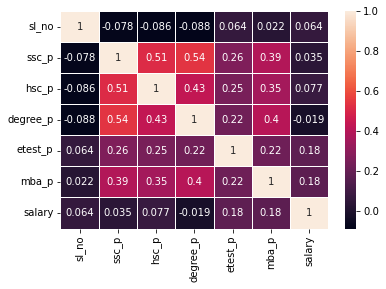

In [136]:
# Getting to know the data
sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns, annot = True, linewidth = 0.5)

In [137]:
# Plots and analysis of variables
# I will plot histograms for all variables and boxplots for numeric data using seaborn package
# An alternative method for creating histograms: df.salary.hist(color = "black")
# An alternative method for creating histograms: plt.boxplot(df.salary)

<AxesSubplot:xlabel='gender', ylabel='Count'>

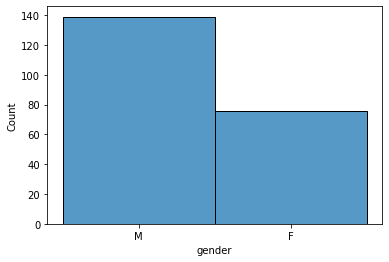

In [138]:
# gender
sns.histplot(df.gender)

/Users/edytastodolkiewicz/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


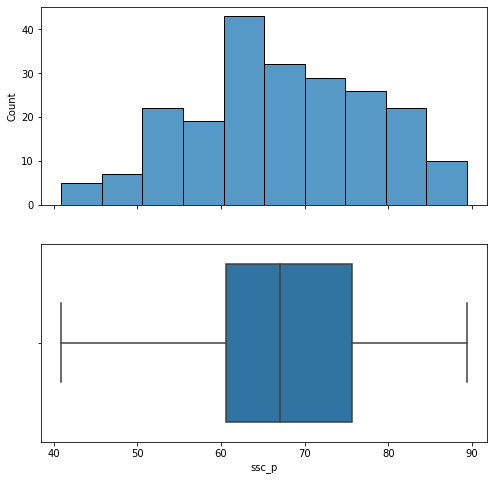

In [139]:
fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize = (8,8))
sns.histplot(df.ssc_p, ax = ax1)
sns.boxplot(df.ssc_p, ax = ax2)
plt.show()

/Users/edytastodolkiewicz/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


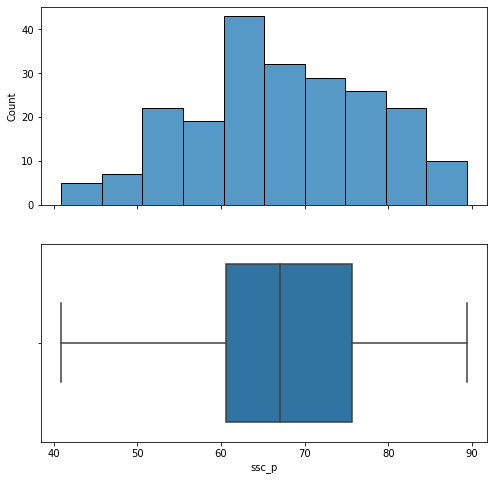

In [140]:
# ssc_p
fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize = (8,8))
sns.histplot(df.ssc_p, ax = ax1)
sns.boxplot(df.ssc_p, ax = ax2)
plt.show()

<AxesSubplot:xlabel='ssc_b', ylabel='Count'>

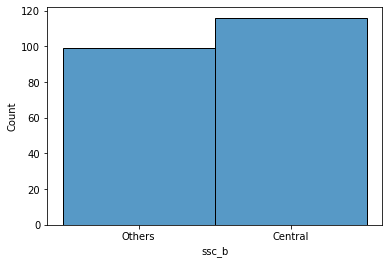

In [141]:
# ssc_b
sns.histplot(df.ssc_b)

/Users/edytastodolkiewicz/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


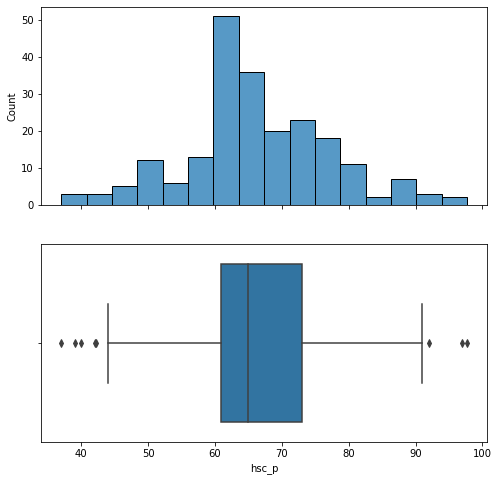

In [142]:
# hsc_p
fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize = (8,8))
sns.histplot(df.hsc_p, ax = ax1)
sns.boxplot(df.hsc_p, ax = ax2)
plt.show()

<AxesSubplot:xlabel='hsc_b', ylabel='Count'>

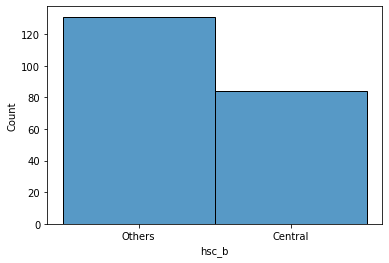

In [143]:
# hsc_b
sns.histplot(df.hsc_b)

/Users/edytastodolkiewicz/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


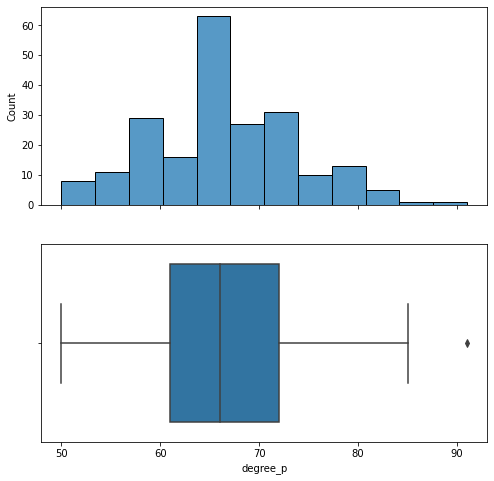

In [144]:
# degree_p
fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize = (8,8))
sns.histplot(df.degree_p, ax = ax1)
sns.boxplot(df.degree_p, ax = ax2)
plt.show()

<AxesSubplot:xlabel='degree_t', ylabel='Count'>

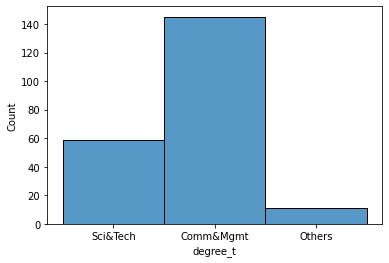

In [145]:
# degree_t
sns.histplot(df.degree_t)

<AxesSubplot:xlabel='workex', ylabel='Count'>

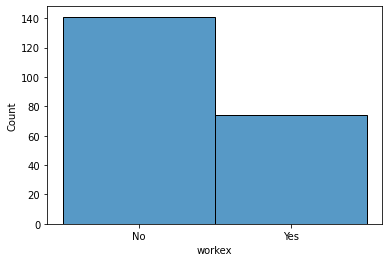

In [146]:
# workex
sns.histplot(df.workex)

/Users/edytastodolkiewicz/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


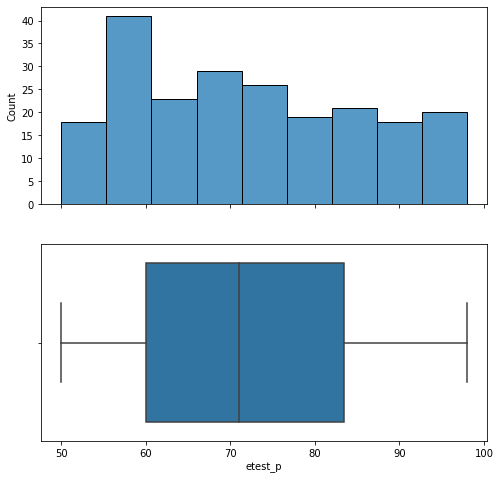

In [147]:
# etest_p
fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize = (8,8))
sns.histplot(df.etest_p, ax = ax1)
sns.boxplot(df.etest_p, ax = ax2)
plt.show()

<AxesSubplot:xlabel='specialisation', ylabel='Count'>

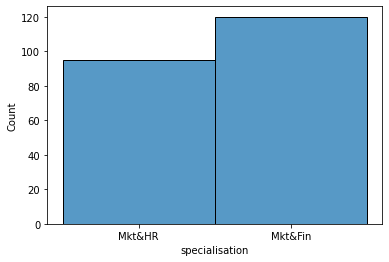

In [148]:
# specialisation
sns.histplot(df.specialisation)

/Users/edytastodolkiewicz/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


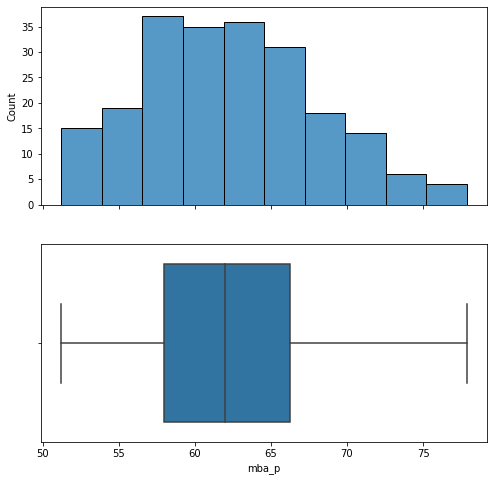

In [149]:
# mba_p
fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize = (8,8))
sns.histplot(df.mba_p, ax = ax1)
sns.boxplot(df.mba_p, ax = ax2)
plt.show()

<AxesSubplot:xlabel='status', ylabel='Count'>

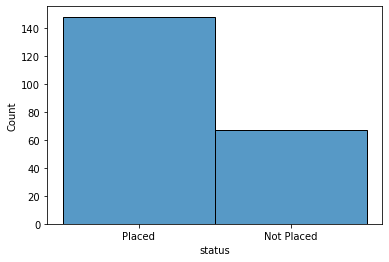

In [150]:
# status
sns.histplot(df.status)

/Users/edytastodolkiewicz/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


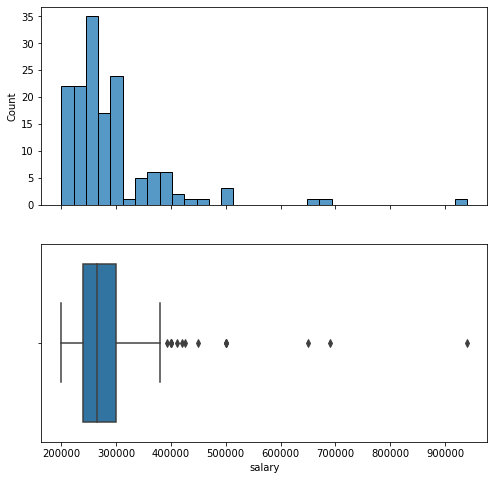

In [151]:
# salary
fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize = (8,8))
sns.histplot(df.salary, ax = ax1)
sns.boxplot(df.salary, ax = ax2)
plt.show()

In [153]:
# Further EDA could include gender based analysis and placement vs academic results analysis

In [232]:
# 1. Który czynnik decyduje o przyjęciu kandydata na studia?
# Jak przeanalizowa dane categorical o wiecej niz 2 kategoriach
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway
from scipy.stats import pointbiserialr

In [242]:
# gender
# CrosstabResult = pd.crosstab(index = df.status, columns = df.gender)
# print(CrosstabResult)
# ChiSqResult = chi2_contingency(CrosstabResult)
# print('The P-Value of the ChiSq Test is:', ChiSqResult[1])
# Variables are not correlated.
pd.crosstab(df.status, df.gender)
# Men seem to be placed more often than women.

gender,F,M
status,,
Not Placed,28,39
Placed,48,100


<AxesSubplot:xlabel='status', ylabel='ssc_p'>

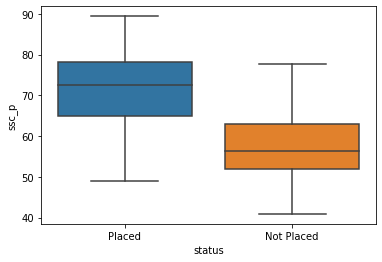

In [235]:
# ssc_p
sns.boxplot(x = df.status, y = df.ssc_p)
# Students with higher ssc_p are more likely to be placed.

In [243]:
# ssc_b
# CrosstabResult = pd.crosstab(index = df.status, columns = df.ssc_b)
# print(CrosstabResult)
# ChiSqResult = chi2_contingency(CrosstabResult)
# print('The P-Value of the ChiSq Test is:', ChiSqResult[1])
# Variables are not correlated.
pd.crosstab(df.status, df.ssc_b)
# ssc_b doesn't seem to impact placement status

ssc_b,Central,Others
status,,
Not Placed,38,29
Placed,78,70


<AxesSubplot:xlabel='status', ylabel='hsc_p'>

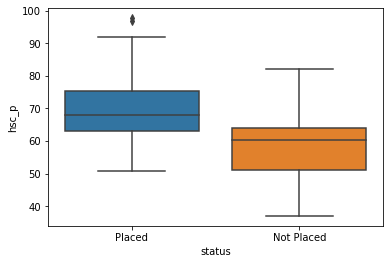

In [239]:
# hsc_p
sns.boxplot(x = df.status, y = df.hsc_p)
# Students with higher ssc_p are more likely to be placed.

In [244]:
# hsc_b
# CrosstabResult = pd.crosstab(index = df.status, columns = df.hsc_b)
# print(CrosstabResult)
# ChiSqResult = chi2_contingency(CrosstabResult)
# print('The P-Value of the ChiSq Test is:', ChiSqResult[1])
# Variables are not correlated.
pd.crosstab(df.status, df.hsc_b)
# hsc_b doesn't seem to impact placement status

hsc_b,Central,Others
status,,
Not Placed,27,40
Placed,57,91


In [158]:
variables

['sl_no',
 'gender',
 'ssc_p',
 'ssc_b',
 'hsc_p',
 'hsc_b',
 'hsc_s',
 'degree_p',
 'degree_t',
 'workex',
 'etest_p',
 'specialisation',
 'mba_p',
 'status',
 'salary']

In [ ]:
# 2. Czy procenty uzyskane w testach (zmienne *_p) wpływają w jakimś stopniu na to, czy kandydat zostanie przyjęty?


In [ ]:
# 3. Jaka specjalizacja jest najbardziej pożądana przez firmy?

In [ ]:
# 4. Przeprowadź wszelkiego rodzaju analizy i testy statystyczne - wedle uznania

In [ ]:
Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status', 'salary'],

2. Klasyfikacja grzybów (https://archive.ics.uci.edu/ml/datasets/Mushroom)
Przy użyciu danych mushrooms.csv zbuduj następujące modele: AdaBoost, XGBoost, LightGBM oraz CatBoost. Porównaj ich wyniki. Spróbuj ulepszyć wyniki każdego z wariantów poprzed dostrojenie parametrów - skorzystaj z dokumentacji wymienionych metod. 

